In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported ")

Libraries imported 


In [ ]:
df = pd.read_csv("/content/sample_data/titanic.csv")

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df = df[['Survived','Pclass','Sex','Age','Fare']]

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [9]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [10]:
df['Age']=df.groupby("Sex")['Age'].transform(lambda x: x.fillna(x.mean()))
print("Null ages are replaced by mean values of female and male i.e genderwise")

Null ages are replaced by mean values of female and male i.e genderwise


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
df['Sex']=le.fit_transform(df.Sex)
print("text in sex feature is converted to number, male-->1 and female --> 2")

text in sex feature is converted to number, male-->1 and female --> 2


In [14]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [15]:
X = df[['Pclass','Sex','Age','Fare']]
y = df['Survived']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
from sklearn.metrics import accuracy_score

predictions_test = clf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, predictions_test)*100)

Accuracy :  79.47761194029852


In [19]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train, predictions_train)

0.985553772070626

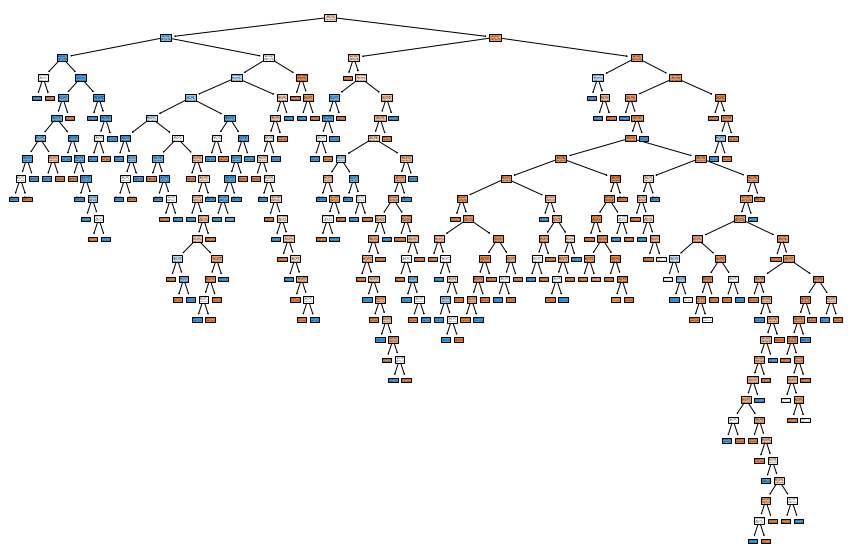

In [20]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print("Evaluating Testing Set")
print("Confusion Matrix")
print(confusion_matrix(y_test, predictions_test))
print("Classification Report")
print(classification_report(y_test, predictions_test))

Evaluating Testing Set
Confusion Matrix
[[147  27]
 [ 28  66]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       174
           1       0.71      0.70      0.71        94

    accuracy                           0.79       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



In [22]:
print("Evaluating Testing Set")
print("Confusion Matrix")
print(confusion_matrix(y_train, predictions_train))
print("Classification Report")
print(classification_report(y_train, predictions_train))

Evaluating Testing Set
Confusion Matrix
[[374   1]
 [  8 240]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       375
           1       1.00      0.97      0.98       248

    accuracy                           0.99       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.99      0.99      0.99       623



In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
dt_probs = clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
print("FPR : ", fpr_dt)
print("TPR : ", tpr_dt)
print("Threshold : ",thresholds_dt)

FPR :  [0.         0.14942529 0.15517241 0.17816092 0.18390805 0.20689655
 1.        ]
TPR :  [0.         0.67021277 0.70212766 0.70212766 0.70212766 0.70212766
 1.        ]
Threshold :  [2.         1.         0.8        0.5        0.2        0.14285714
 0.        ]


In [24]:
auc_score_dt = auc(fpr_dt, tpr_dt)
auc_score_dt

0.7653154805575935

In [25]:
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(10,8))
  plt.plot(fpr_dt, tpr_dt, color="orange", label="AUC = %0.2f" % auc_score_dt)
  plt.plot([0,1], [0,1], color='darkblue', linestyle='--')
  plt.xlabel('Flase Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

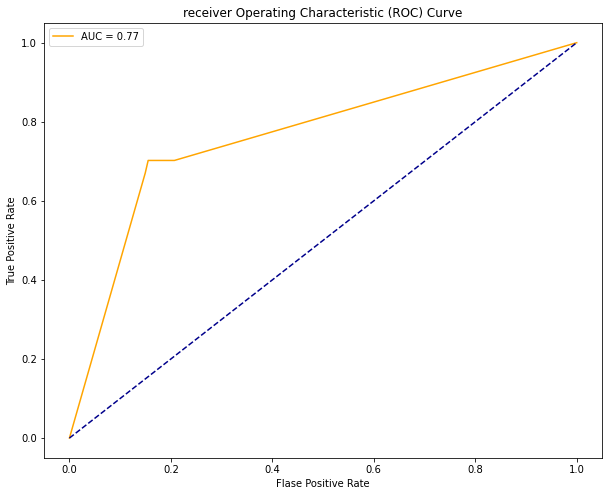

In [26]:
plot_roc_curve(fpr_dt, tpr_dt)

In [27]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

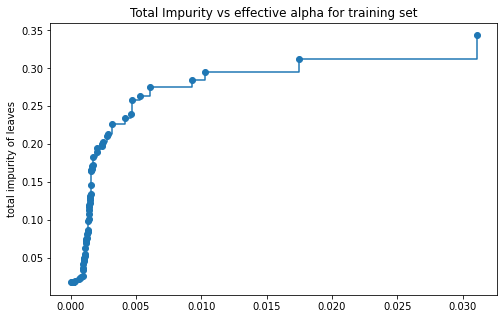

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [29]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train, clfs.append(clf))

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
    clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13574173726083866


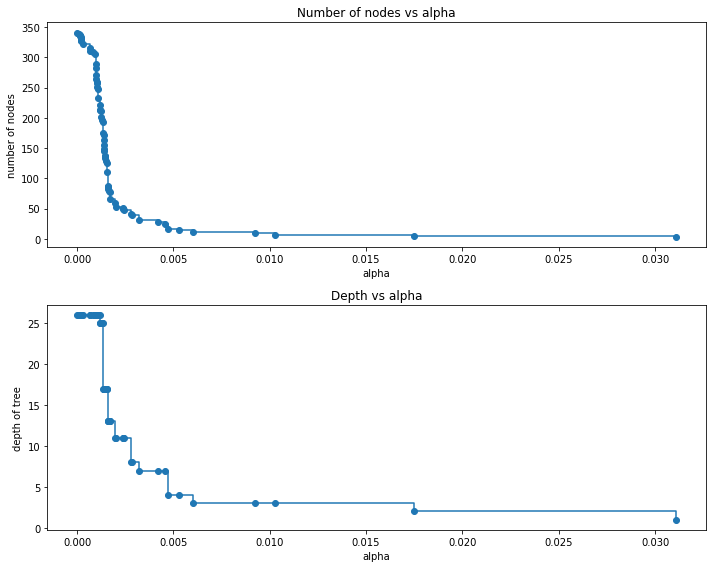

In [30]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

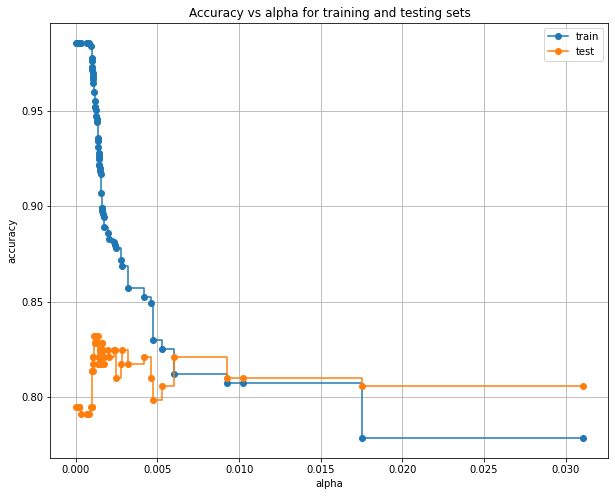

In [31]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [32]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.016)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.016, random_state=0)

In [33]:
from sklearn.metrics import accuracy_score
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.8097014925373134

In [34]:
pred_1 = clf.predict(X_train)
accuracy_score(y_train, pred_1)

0.8073836276083467

[Text(0.6, 0.875, 'X[1] <= 0.5\ngini = 0.479\nsamples = 623\nvalue = [375, 248]'),
 Text(0.4, 0.625, 'X[0] <= 2.5\ngini = 0.382\nsamples = 226\nvalue = [58, 168]'),
 Text(0.2, 0.375, 'gini = 0.123\nsamples = 122\nvalue = [8, 114]'),
 Text(0.6, 0.375, 'X[3] <= 24.808\ngini = 0.499\nsamples = 104\nvalue = [50, 54]'),
 Text(0.4, 0.125, 'gini = 0.466\nsamples = 84\nvalue = [31, 53]'),
 Text(0.8, 0.125, 'gini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.8, 0.625, 'gini = 0.322\nsamples = 397\nvalue = [317, 80]')]

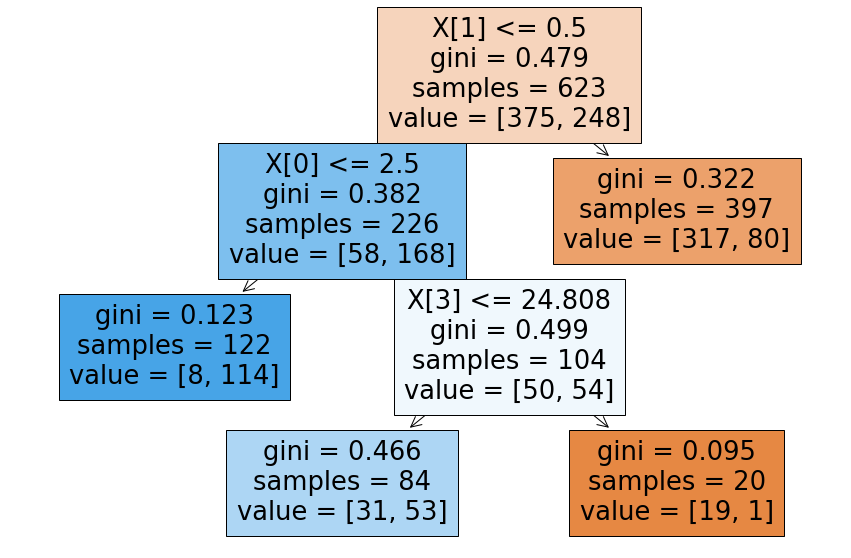

In [35]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)